In [1]:
import os
import glob
import re
import seaborn as sns
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
from pandas import (
    Series,
    DataFrame, 
    set_option
    )
from dataset import Dataset
from params import get_params
set_option("display.max_columns",150)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pierredelice/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
params = get_params()
dataset = Dataset(params)
df = dataset.get_data()
#bd.to_pickle('~/Documents/GitHub/Defunción/data/bd.pkl', sep=',', index=False, header=True)
bd = df.copy()

In [3]:
#Sample data
bd = bd.sample(frac=0.1)

In [4]:
RE_SUSPICIOUS = re.compile(r'[&#<>{}\[\]\\]')

def impurity(text, min_len=10):
    """returns the share of suspicious characters in a text""" 
    if text == None or len(text) < min_len:
        return 0 
    else:
        return len(RE_SUSPICIOUS.findall(text))/len(text)


In [5]:
from nltk.tokenize import word_tokenize
bd['length'] = bd['nombre'].str.len()
bd['tokens'] = bd['nombre'].apply(word_tokenize)
#length of names
bd['tokens_len'] = bd['tokens'].str.len()
#bd['tokens_len'] = [len(elt.split()) for elt in bd['nombre']]
bd['tokens_len'] = bd['tokens_len'].astype('int8')
#Sexo
bd['sexo'] = bd.sexo.replace((0,9),np.nan)
#edad
bd['edad'] = bd.edad.replace((888,999),np.nan)
bd['edad_est'] = round(((bd['fec_def'] - bd['fec_nac']))/ np.timedelta64(1, 'Y'),0)

# add new column to data frame
bd['impurity'] = bd['nom_c'].apply(impurity, min_len=5)
# get the top 3 records
#bd[['nom_c', 'impurity']].sort_values(by='impurity', ascending=False).head(3)

In [6]:
#bd.describe(include='O').T
bd.describe().T

,count,mean,std,min,25%,50%,75%,max
sexo,892138.0,1.438182e+00,4.961641e-01,1.0,1.0,1.0,2.0,2.0
edad_c,893368.0,4.939541e+00,4.179168e-01,0.0,5.0,5.0,5.0,9.0
edad,891336.0,6.368984e+01,2.265816e+01,0.0,52.0,68.0,81.0,124.0
res_ent,893368.0,1.703157e+01,9.893124e+00,0.0,10.0,15.0,23.0,99.0
res_mun,893368.0,1.708986e+04,9.945399e+03,0.0,10012.0,15081.0,23005.0,99999.0
res_loc,893368.0,1.708988e+08,9.945437e+07,0.0,100120001.0,150810001.0,230050001.0,999999999.0
afiliacion,893368.0,9.791939e+00,2.478281e+01,0.0,1.0,2.0,7.0,99.0
edo_civil,893368.0,3.604667e+00,2.165537e+00,0.0,2.0,4.0,5.0,9.0
escolar,893368.0,3.822589e+01,2.749047e+01,0.0,31.0,32.0,51.0,122.0
def_ent,893368.0,1.652321e+01,8.271266e+00,0.0,9.0,15.0,22.0,99.0


In [7]:
bd.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893368 entries, 318443 to 127282
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   nom_c       893368 non-null  object        
 1   sexo        892138 non-null  float64       
 2   edad_c      893368 non-null  uint32        
 3   edad        891336 non-null  float64       
 4   res_ent     893368 non-null  uint32        
 5   res_mun     893368 non-null  uint32        
 6   res_loc     893368 non-null  uint32        
 7   curp        743273 non-null  category      
 8   afiliacion  893368 non-null  uint32        
 9   edo_civil   893368 non-null  uint32        
 10  escolar     893368 non-null  uint32        
 11  ocupacion   882470 non-null  category      
 12  def_ent     893368 non-null  uint32        
 13  def_mun     893368 non-null  uint32        
 14  def_loc     893368 non-null  category      
 15  causa_bas   891919 non-null  category      
 1

In [ ]:
bd[bd['nombre'].str.contains('juan')]['nombre'].value_counts()

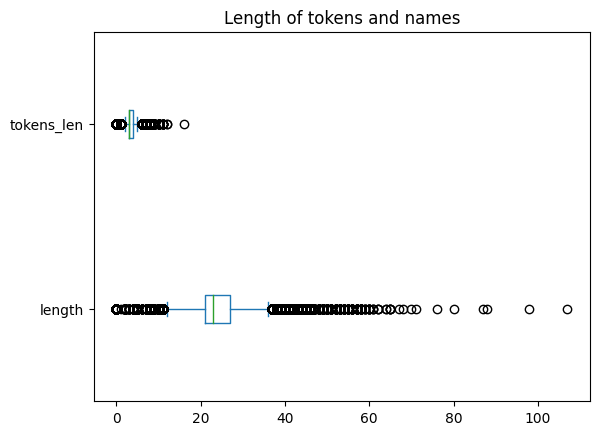

In [9]:
bd[['length','tokens_len']].plot(kind='box', vert = False)
plt.title('Length of tokens and names')
filename = 'box_length.png'
filename = join(
    params["path"]+params["path graphics"],
    filename
)
plt.savefig(filename)

<AxesSubplot: ylabel='Frequency'>

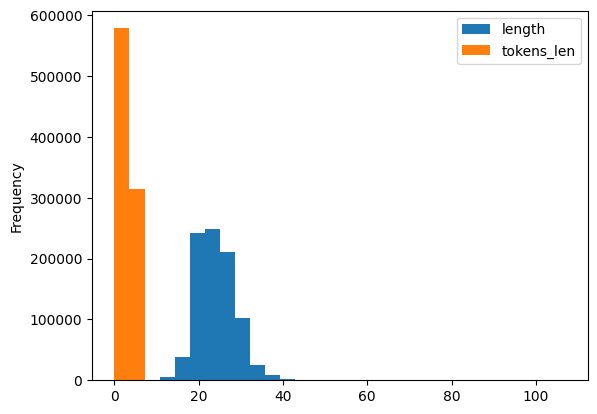

In [10]:
bd[['length','tokens_len']].plot(kind='hist', bins=30)

In [ ]:
from nltk import word_tokenize, pos_tag, ne_chunk
#bd['nombre'] = bd['nombre'].astype('object')

tokens = word_tokenize(str(bd['nombre']))
pos_tags = pos_tag(tokens)
named_entities = ne_chunk(pos_tags)
print(named_entities)

In [12]:
pd.crosstab(bd.tokens_len,bd.base)

base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
tokens_len,,,,,,,,,,,,,
0,2410,2562,2588,232,30,201,266,303,158,199,275,271,87
1,26,29,20,10,8,5,7,6,432,468,406,222,57
2,74,92,39,47,93,26,36,44,291,299,300,189,69
3,35469,35687,36092,39788,40405,41737,42527,43134,43024,45738,67314,69648,25093
4,14283,14693,15354,16479,17280,17906,19308,20154,20319,21722,31941,33802,12373
5,2729,2718,2815,2892,3109,3218,3363,3379,3374,3683,5306,5575,1971
6,798,801,837,880,971,894,958,962,992,1038,1521,1562,616
7,107,94,126,111,143,141,136,133,123,134,200,186,85
8,27,27,28,28,33,26,31,35,35,26,33,33,32


In [13]:
#bd.groupby('base').res_ent.value_counts()
pd.crosstab(bd.res_ent, bd.base)

base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
res_ent,,,,,,,,,,,,,
0,0,0,0,158,191,154,169,219,143,120,82,67,31
1,499,493,537,567,584,587,628,656,663,722,1053,979,405
2,1425,1513,1436,1545,1619,1606,1666,1796,1787,2089,3224,2893,1151
3,242,239,264,255,287,314,303,378,349,362,474,594,206
4,379,329,366,378,420,463,486,445,467,506,766,755,278
5,1074,1149,1320,1407,1606,1533,1602,1676,1771,1885,2881,2385,1137
6,302,321,353,328,394,438,483,472,476,479,622,692,274
7,1872,1842,1959,2167,2376,2601,2526,2493,2624,2777,3839,3832,1509
8,2137,2291,2038,2104,2076,2163,2233,2350,2501,2478,3790,3181,1360


In [14]:
bd.loc[ [bd.edad.idxmin(),df.edad.idxmax()],
    ['sexo','edad','edad_c','fec_nac', 'fec_def']
    ]

,sexo,edad,edad_c,fec_nac,fec_def
1306,2.0,0.0,2,2011-12-10,2011-12-10
1306,2.0,1.0,2,2012-08-23,2012-08-23
1306,1.0,51.0,1,2014-03-02,2014-03-02
1306,1.0,NaN,0,1939-06-13,2018-11-25
1306,2.0,1.0,2,2021-09-16,2021-09-16
1389,2.0,1.0,2,2013-09-09,2013-09-09
1389,1.0,1.0,2,2021-02-15,2021-02-15


<AxesSubplot: title={'center': 'Number of deaths per year'}, xlabel='base'>

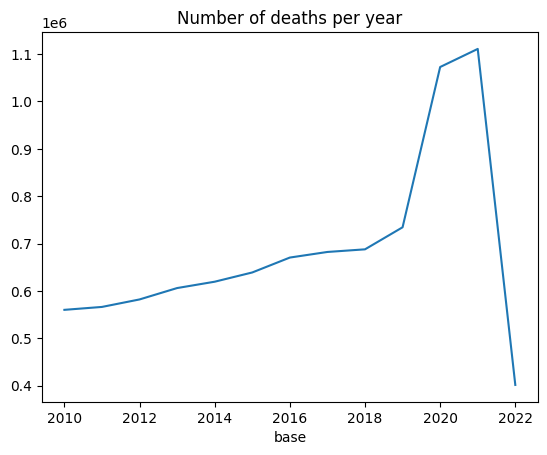

In [15]:
df.groupby('base').size().plot(title="Number of deaths per year")

#df.groupby('base').agg({'sexo': 'sum'}) \
# .plot(title="Avg. Speech Length", ylim=(0,30000))

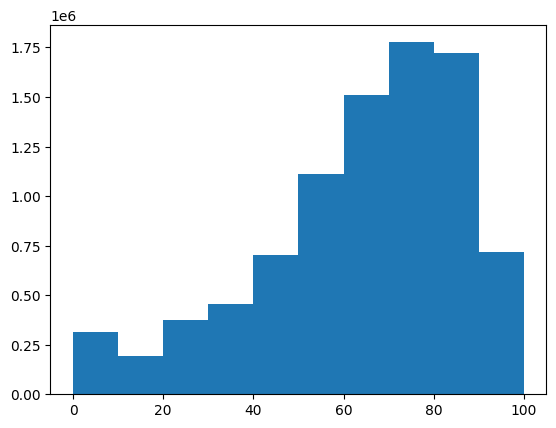

In [16]:
plt.hist(df['edad'], range=(0,100), bins=10)
filename = 'edad.png'
filename = join(
    params["path"]+params["path graphics"],
    filename
)
plt.savefig(filename)

/var/folders/f7/cfmwg9550852tgnwq3tw36vr0000gn/T/ipykernel_4957/3024593917.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


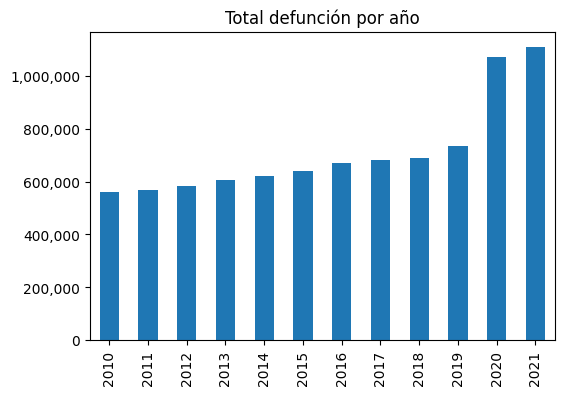

In [17]:
df.loc[df['base']<= 2021]['base'].value_counts().sort_index().plot(kind='bar', figsize=(6,4))
plt.title("Total defunción por año")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

filename = "def_anio.png"
filename = join(
    params["path"]+params["path graphics"],
    filename
)
plt.savefig(filename)
#plt.show();

In [ ]:
bd[['nombre','nom_c','sexo','edad','fec_nac','curp','res_ent','res_mun','res_loc','base']].sort_values(['fec_nac'])

In [19]:
curp_extract = re.compile(r'\d{6}')
#\d{6}
def extract(text, min_length=10):
    if text==None or len(text) < min_length:
        return None
    else:
        return ''.join(curp_extract.findall(text))

bd['curp_fecnac'] = bd['curp'].apply(extract, min_length=10)
bd.loc[bd['curp_fecnac'] >='888888'] = np.nan

In [20]:
bd.loc[bd['curp_fecnac'] >='888888']

,nom_c,sexo,edad_c,edad,res_ent,res_mun,res_loc,curp,afiliacion,edo_civil,escolar,ocupacion,def_ent,def_mun,def_loc,causa_bas,base,fec_nac,fec_def,miscol,nombre,length,tokens,tokens_len,edad_est,impurity,curp_fecnac


In [21]:
bd[['edad','fec_nac','curp','curp_fecnac','base']][bd['curp_fecnac'].notnull() & bd['fec_nac'].isna()]

,edad,fec_nac,curp,curp_fecnac,base
424325,75.0,NaT,NO ESPECIFICADO,,2017.0
183959,55.0,NaT,NO ESPECIFICADO,,2015.0
238921,60.0,NaT,NO ESPECIFICADO,,2016.0
401224,76.0,NaT,NO ESPECIFICADO,,2014.0
82378,35.0,NaT,NO ESPECIFICADO,,2014.0
...,...,...,...,...,...
110717,41.0,NaT,NO ESPECIFICADO,,2016.0
618389,NaN,NaT,NO ESPECIFICADO,,2014.0
225982,60.0,NaT,NO ESPECIFICADO,,2013.0
84515,35.0,NaT,NO ESPECIFICADO,,2016.0


In [22]:
pd.crosstab(bd.edad,bd.base)

base,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
edad,,,,,,,,,,,,,
0.0,18,28,37,0,0,0,0,0,0,0,0,0,0
1.0,817,813,784,739,636,657,682,651,147,177,163,182,90
2.0,531,561,564,546,520,502,467,467,112,131,83,130,65
3.0,371,363,334,392,339,367,298,337,95,87,86,96,50
4.0,267,278,308,264,251,247,218,267,69,63,52,71,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118.0,0,0,0,0,0,0,0,0,0,0,3,3,1
119.0,0,0,0,0,0,0,0,0,0,0,1,4,1
120.0,3,3,0,0,0,0,0,0,0,0,2,3,2


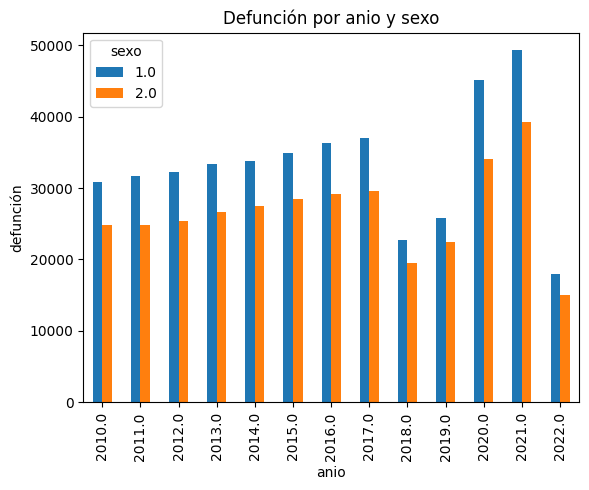

In [23]:
pd.crosstab(bd.base,bd.sexo).plot(kind='bar')
plt.title('Defunción por anio y sexo')
plt.xlabel('anio')
plt.ylabel('defunción')

filename = 'sexo.png'
filename = join(
    params["path"]+params["path graphics"],
    filename
)
plt.savefig(filename)

In [24]:
bins = [0,4,9,14,19,24,29,34,39,44,49,
        54,59,64,69,74,79,84,89,94,120]
labels = ['0-4','5-9','10-14','15-19',
        '20-24','25-29','30-34','35-39',
        '40-44','45-49','50-54','54-59',
        '60-64','65-69','70-74','75-79',
        '80-84','85-89','90-94', '95+']
bd['agerange'] = pd.cut(bd.edad, bins, labels = labels,include_lowest = True)


In [25]:
pyramid = pd.crosstab(bd.agerange,bd.sexo).reset_index()
pyramid = pyramid.rename(columns={1:'Masculino',2:'Femenino','agerange':'age'})
#pyramid = pyramid.set_index('agerange')
pyramid['Masculino'] = pyramid['Masculino']/(-1000)
pyramid['Femenino'] = pyramid['Femenino']/(1000)
ages = pyramid.reset_index()['age'].sort_values(ascending=False).to_list()

In [26]:
pyramid

sexo,age,Masculino,Femenino
0,0-4,-9.431,7.390
1,5-9,-4.376,3.626
2,10-14,-3.361,2.420
3,15-19,-6.303,2.833
4,20-24,-7.006,2.270
5,25-29,-7.754,2.506
6,30-34,-11.856,4.188
7,35-39,-15.290,6.294
8,40-44,-18.218,8.744
9,45-49,-22.294,12.545


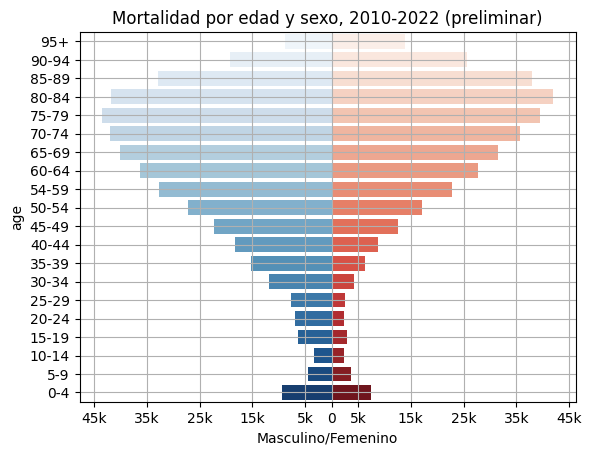

In [27]:
ax1 = sns.barplot(x='Masculino', y='age', data=pyramid, order=ages, palette="Blues")
ax2 = sns.barplot(x='Femenino', y='age', data=pyramid, order=ages, palette="Reds")

plt.title("Mortalidad por edad y sexo, 2010-2022 (preliminar)")
plt.xlabel("Masculino/Femenino")
plt.grid()
plt.xticks(ticks=[-45,-35,-25,-15,-5,0,5,15,25,35,45],
labels=['45k','35k','25k','15k','5k',0,'5k','15k','25k','35k','45k'])

filename = 'mort_age.png'
filename = join(params['path']+params['path graphics'],filename)
plt.savefig(filename)